In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-3.0, 3.0, 1000)
Y = np.linspace(-1.5, 1.5, 1000)
c = 0.1*1j

X_grid, Y_grid = np.meshgrid(X, Y)
Z_grid = X_grid + Y_grid*1j

def f(z):
    return z*z*z + c

def df(z):
    return 3*z*z

def find_root(x0, num):
    if num == 0:
        return x0
    else:
        x1 = x0 - f(x0)/df(x0)
        return find_root(x1, num-1)

In [3]:
Z_hit = np.round(find_root(Z_grid, 50), 5)
Z_unique, Z_counts = np.unique(Z_hit, return_counts=True)

In [4]:
colors = np.angle(Z_unique)
Z_colored = Z_hit

for j in np.arange(len(X)):
    for i in np.arange(len(Y)):
        k = np.argmin(abs(Z_hit[i][j] - Z_unique))
        Z_colored[i][j] = colors[k]

Z_colored = np.real(Z_colored)

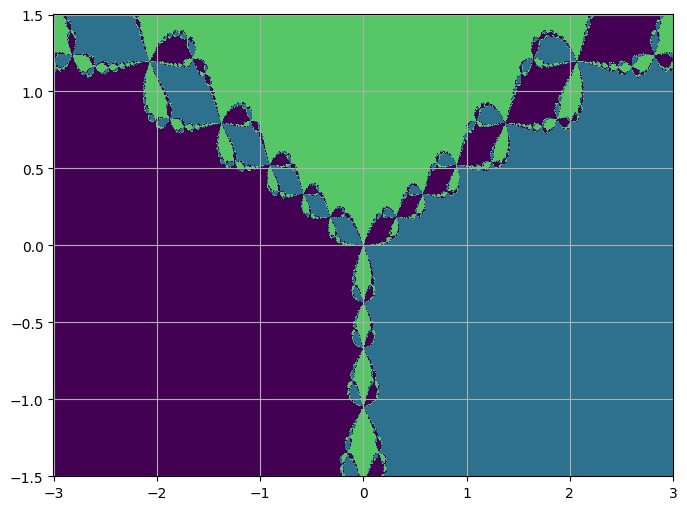

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

ax.pcolormesh(X_grid, Y_grid, Z_colored)
ax.grid(True)